In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import jax
import jax.numpy as jnp
import numpy as np
import visualization
from data import standardize
from utils import results, experiments, settings, equioutput, evaluation, graphs
import global_settings
import os
import matplotlib

In [2]:
tanh_planes = 8
k = 1024
sim = "rbf"

In [3]:
result = results.ResultSample.load_from_file(
    # 1 hl, 3 hn
    "/home/gw/data/experiments/paper/results/6414c528c5f8cc0c9f08578de5fb1dbc.tar.gz"
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()
print(experiment._settings)

SettingsExperimentSample(output_path='/u/halle/wiese/home_at/data/experiments/paper/results', dataset='sinusoidal', dataset_normalization='standardization', hidden_layers=1, hidden_neurons=3, activation='tanh', activation_last_layer='none', num_warmup=1024, statistic='reduced', statistic_p=0.99, samples_per_chain=1, identifiable_modes=3, pool_size=16, seed=0, overwrite_chains=None)


In [4]:
folder = os.path.join(global_settings.PATH_PAPER_RESULTS, result.identifier)
file_name = os.path.join(folder, f"{result.identifier}_{tanh_planes}_{k}_{sim}.npy")
#file_name = os.path.join(folder, f"{result.identifier}_fixed.npy")
#file_name = "/home/gw/mt_code/notebooks/99_other/permutation_removal_history_0.pny.npy"
print(file_name)

samples_parameters_reduced = None
if os.path.exists(file_name):
    samples_parameters_reduced = jnp.load(file_name)
    print(samples_parameters_reduced.shape)

/home/gw/data/experiments/paper/results/6414c528c5f8cc0c9f08578de5fb1dbc/6414c528c5f8cc0c9f08578de5fb1dbc_8_1024_rbf.npy
(1274, 10)


In [5]:
sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
structured_sequential_samples_parameters = sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=samples_parameters_reduced
    #samples_parameters=result.samples["parameters"]
)
symmetry_helper = equioutput.SymmetryHelper(structured_sequential_samples_parameters)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.77it/s]


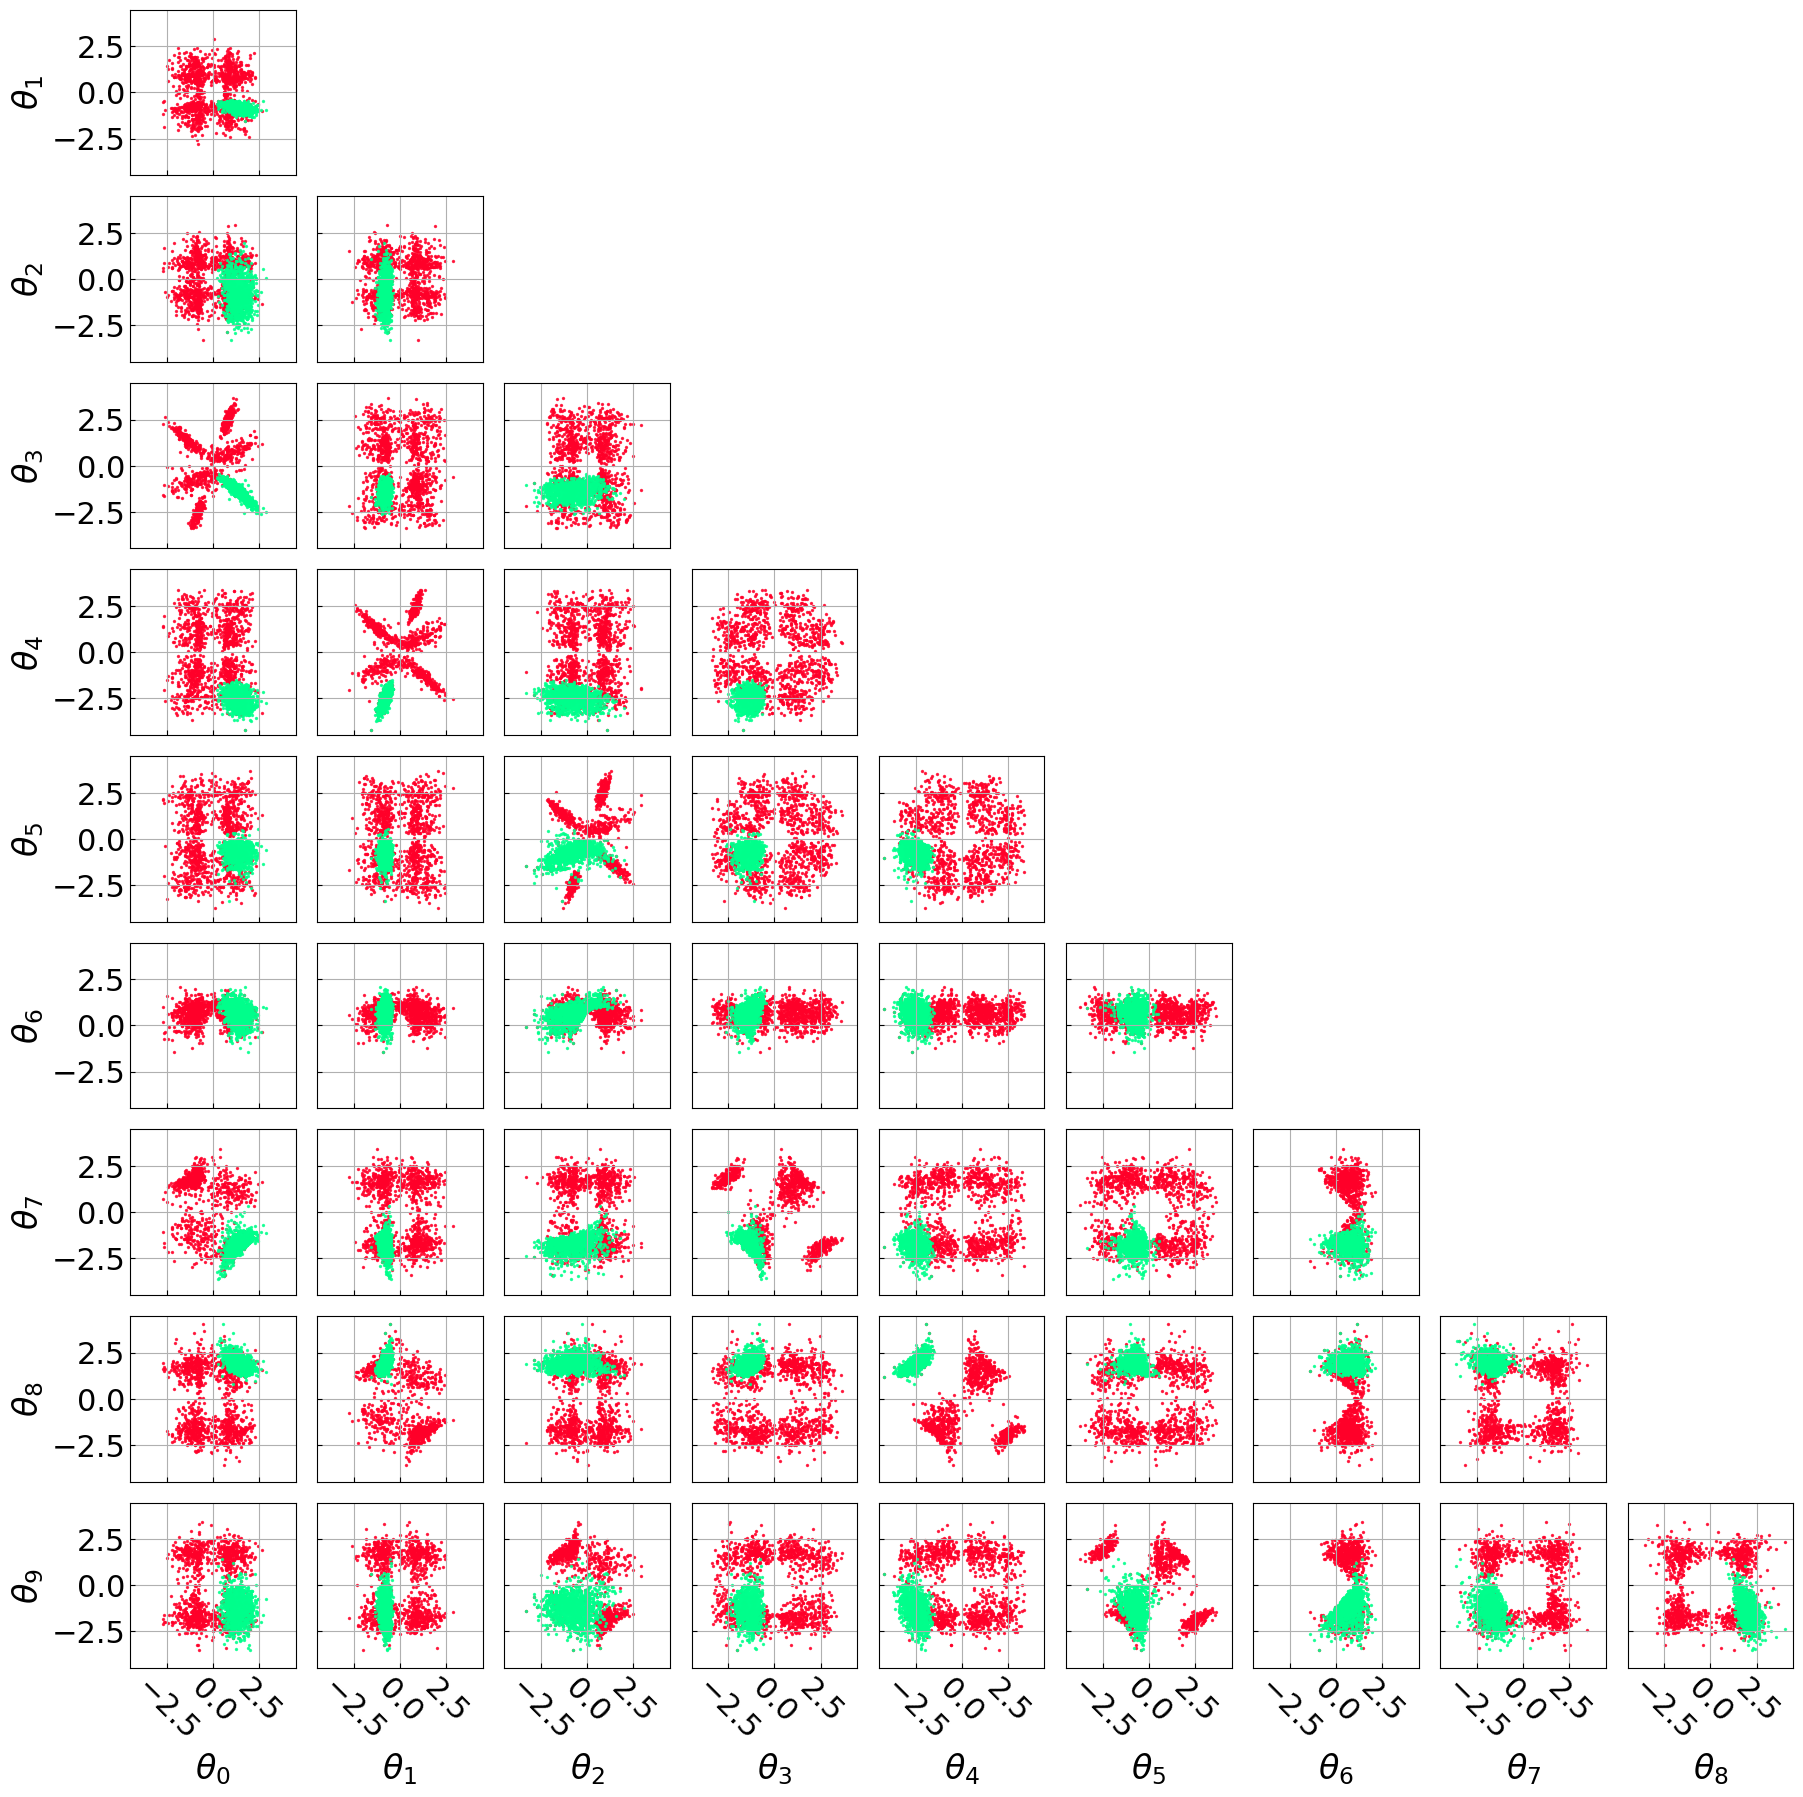

In [13]:
import matplotlib.pyplot as plt
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=2.0,
        ax_height=2.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.8,
            size=2.0
        ),
        label_size=20,
        #cmap=matplotlib.cm.get_cmap("rainbow"),
        univariate=False
    )
)
figure.plot(
    data_list=[
        result.samples["parameters"],
        structured_sequential_samples_parameters.samples_parameters
    ],
    textsize=24,
    rasterized=True
)

In [14]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "full_posterior.pdf"), bbox_inches="tight", dpi=192, transparent=True)